# Text Analytics | BAIS:6100
# Homework 5. Text Classification and Clustering, Topic Modeling, and Keyword Network Analysis

10 questions, 7 points in total

## Instructions

- Fill in the Python statements needed to complete all the questions below. 
- Program everything inside this notebook. 
- Use only one cell per question. 
- Each code cell must be run with no errors.
- Do not contain any unnecessary code in your answer. (Only the final outcome will be regarded as your answer.)
- If the question requests that you store information in a certain variable, use the specific variables name (case sensitive).
- All problems must be solved in a programmable way.
- When you are done, make sure to save your notebook and then click Restart & Run All before subimission to create a clean version.

## Questions

You are going to use a data set from Kaggle.com, which contains 50,000 movie reviews from IMDB and their sentiments. For simplicity, you are going to drop all duplicates and reduce the size of the dataset to 5,000. Run the code cell below to get a dataframe `df`. 

IMDB Dataset of 50K Movie Reviews: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/

In [1]:
# Do not make any change to this cell. Just run this cell.
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv("classdata/IMDB_Dataset.csv")
df = df.drop_duplicates(["review"])
df = df.sample(n=5000, replace=False, random_state=0)
df

,review,sentiment
166,Originally I was a Tenacious D fan of their first album and naturally listened to a few tracks off The P.O.D. and was rather disappointed. After w...,positive
28039,"This first-rate western tale of the gold rush brings great excitement, romance, and James Stewart to the screen. ""The Far Country"" is the only one...",positive
35960,"One of the all-time great science fiction works, as visionary and thought-provoking as Blade Runner or even Gilliam's own Brazil. Willis gives his...",positive
1872,Mickey Rourke ( who was once a famous movie star ) plays Martin Fallon an IRA terrorist who accidentally blows up a school bus full of children wh...,negative
12728,this is the worst movie ive ever seen. And i have seen lots of movies. Me and my friends rented this one a wendsday evening. Man we had lots of fu...,negative
...,...,...
8164,This western is done in a different manner than most others. Realism is the key here. Conchata Farrell comes to Wyoming to work for Rip Torn on hi...,positive
1351,"I've been playing this movie incessantly this month, and I just love it. I was around in the 60s (oh dear), so it is nostalgic in one sense. Howev...",positive
6918,"I hope whoever coached these losers on their accents was fired. The only high points are a few of the supporting characters, 3 of 5 of my favourit...",negative
31544,"All right, I'll grant you that some of the science in ""Doppelganger"" (or ""Journey To The Far Side Of The Sun"") is kind of dopey.The idea of an ent...",positive


1\. (0.2 pts) There are two unique values in the `sentiment` column of `df`, which are *positive* and *negative*. Show the count for each value. 

In [2]:
# Your answer here
df.sentiment.value_counts()

negative    2501
positive    2499
Name: sentiment, dtype: int64

2\. (0.4 pts) You are going to develop a binary classification model that is able to classify the sentiment of text as either positive or negative. The words in the `review` column will be used as the features of the model, and the sentiments in the `sentiment` column will be used as the target of the model. Do the following in order:
- Initialize a TfidfVectorizer object. Apply TF-IDF and L2 normalization, use the default English stopwords provided by the Scikit-Learn package, and set the maximum document frequency to 0.7. 
- Fit and transform the `review` column using the vectorizer and save it in `X`. Then, save the `sentiment` column in `y`. 
- Split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`, such that the test set size is 20% of the entire data set. Set `random_state` to 0. 

In [3]:
# Your answer here
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.review)
y = df.sentiment

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [4]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 38475), (1000, 38475), (4000,), (1000,))

3\. (0.8 pts) In order to develop a classifier using k-NNs, do the following in order:
- Using 10-fold cross validation, find the optimal `n_neighbors` parameter value that yields the best performance. Try 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10 as parameter value candidates. 
- Using the `train_test` function in the code cell below, fit the k-NNs model with the optimal parameter value found. 

In [5]:
# Do not make any change to this cell. Just run this cell.
from sklearn.metrics import classification_report, confusion_matrix

def train_test(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    
    print("Train score: {:.2f}".format(classifier.score(X_train, y_train)))
    print("Test score: {:.2f}\n".format(classifier.score(X_test, y_test)))
    print("Classification report:\n{}".format(classification_report(y_test, pred, zero_division=0)))
    print(confusion_matrix(y_test,pred))
    
    return classifier

In [6]:
# Your answer here
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

score_max = 0
for param in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=param)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print("k = {}: {}\n{:.3f}, {:.3f}\n".format(param, scores, scores.mean(), scores.std()))
    
    if scores.mean() > score_max:
        score_max = scores.mean()
        param_best = param
        
print("Highest score : {:.3f} when k = {}\n".format(score_max, param_best))

print("k = {}".format(param_best))
knn = KNeighborsClassifier(n_neighbors=param_best)
knn = train_test(X_train, X_test, y_train, y_test, knn)

k = 1: [0.68   0.65   0.68   0.6575 0.62   0.6625 0.665  0.6875 0.6725 0.6625]
0.664, 0.018

k = 2: [0.605  0.64   0.6375 0.6275 0.615  0.66   0.6475 0.6875 0.675  0.645 ]
0.644, 0.024

k = 3: [0.65   0.675  0.675  0.68   0.665  0.6825 0.695  0.6925 0.7375 0.685 ]
0.684, 0.022

k = 4: [0.6475 0.6625 0.6625 0.6625 0.65   0.6475 0.655  0.67   0.6875 0.665 ]
0.661, 0.012

k = 5: [0.6675 0.6575 0.7075 0.685  0.6825 0.6575 0.7    0.7    0.72   0.6825]
0.686, 0.020

k = 6: [0.64   0.6475 0.6825 0.665  0.665  0.64   0.6675 0.71   0.7025 0.6525]
0.667, 0.023

k = 7: [0.6725 0.67   0.7075 0.6975 0.6675 0.6625 0.6975 0.7425 0.7275 0.67  ]
0.692, 0.026

k = 8: [0.645  0.65   0.6925 0.6625 0.645  0.66   0.675  0.7    0.7125 0.645 ]
0.669, 0.024

k = 9: [0.68   0.675  0.71   0.68   0.685  0.685  0.6825 0.725  0.73   0.66  ]
0.691, 0.022

k = 10: [0.66   0.66   0.7025 0.68   0.6675 0.6625 0.66   0.7025 0.7125 0.6375]
0.674, 0.023

Highest score : 0.692 when k = 7

k = 7
Train score: 0.79
Test score:

4\. (0.4 pts) There are three new texts as below, on which you want to predict the sentiments. Applying the fitted k-NN model to the new texts, save the list of predictions made in the variable `ans4`.  

In [7]:
# Do not make any change to this cell. Just run this cell.
text1 = "A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done."
text2 = "This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air."
text3 = "Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."

In [8]:
# Your answer here
new_texts = [text1, text2, text3]
X_new = vectorizer.transform(new_texts)
ans4 = knn.predict(X_new)

In [9]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans4

array(['negative', 'negative', 'negative'], dtype=object)

5\. (0.4 pts) Develop a logistic regression model using the same `X_train`, `X_test`, `y_train`, and `y_test`. Applying the logistic regression model to the same new texts, save the list of predictions in the variable named `ans5`. Note that you do not have to perform cross validation this time, as there are no parameters to optimze. Do not redefine `X_train`, `X_test`, `y_train`, `y_test`, and `X_new`. You just reuse them. 

In [10]:
# Your answer here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = train_test(X_train, X_test, y_train, y_test, lr)
ans5 = lr.predict(X_new)

Train score: 0.96
Test score: 0.85

Classification report:
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85       515
    positive       0.83      0.88      0.85       485

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

[[427  88]
 [ 59 426]]


In [11]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans5

array(['positive', 'negative', 'negative'], dtype=object)

6\. (1.4 pts) You are going to find 10 clusters of similar reviews using k-means clustering. Again, the words in the `review` column will be used as the features of the model, so you can continue to use `X`. Do the following in order:
- Initialize a KMeans object by setting the number of clusters accordingly and `random_state` to 0. 
- Fit the model with `X`. This may take several minutes to complete. 
- Add a new column `cluster` to `df`, such that each review is assigned a cluster number. 

In [12]:
# Your answer here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
df["cluster"] = kmeans.labels_

In [13]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df

,review,sentiment,cluster
166,Originally I was a Tenacious D fan of their first album and naturally listened to a few tracks off The P.O.D. and was rather disappointed. After w...,positive,0
28039,"This first-rate western tale of the gold rush brings great excitement, romance, and James Stewart to the screen. ""The Far Country"" is the only one...",positive,6
35960,"One of the all-time great science fiction works, as visionary and thought-provoking as Blade Runner or even Gilliam's own Brazil. Willis gives his...",positive,6
1872,Mickey Rourke ( who was once a famous movie star ) plays Martin Fallon an IRA terrorist who accidentally blows up a school bus full of children wh...,negative,1
12728,this is the worst movie ive ever seen. And i have seen lots of movies. Me and my friends rented this one a wendsday evening. Man we had lots of fu...,negative,8
...,...,...,...
8164,This western is done in a different manner than most others. Realism is the key here. Conchata Farrell comes to Wyoming to work for Rip Torn on hi...,positive,3
1351,"I've been playing this movie incessantly this month, and I just love it. I was around in the 60s (oh dear), so it is nostalgic in one sense. Howev...",positive,7
6918,"I hope whoever coached these losers on their accents was fired. The only high points are a few of the supporting characters, 3 of 5 of my favourit...",negative,4
31544,"All right, I'll grant you that some of the science in ""Doppelganger"" (or ""Journey To The Far Side Of The Sun"") is kind of dopey.The idea of an ent...",positive,4


7\. (0.2 pts) Show the count for each value in the `cluster` column. 

In [14]:
# Your answer here
df.cluster.value_counts()

4    786
6    730
1    546
8    540
9    526
7    519
3    503
2    373
0    326
5    151
Name: cluster, dtype: int64

8\. (0.2 pts) Get a random sample of ten rows from the largest cluster and save the resulting dataframe in the `ans8` variable. 

In [15]:
# Your answer here
ans8 = df[df.cluster == df.cluster.value_counts().idxmax()].sample(n=10)

In [16]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans8

,review,sentiment,cluster
2581,"Well, where to begin? I guess I can start with the general complaint regarding the way in which this film is marketed. Call me ignorant for not kn...",negative,4
35880,I had nowhere to go. I was on a flight to Vancouver. I would probably have missed this film if I hadn't chosen Air Canada. Watched on a small scre...,positive,4
11789,Sharky's Machine is a crime drama set in early 80's Atlanta. It stars Burt Reynolds as a renegade cop who is hellbent on stopping crime and corrup...,positive,4
25677,"William Shakespeare's plays are classified as comedy, tragedy, or history. Some of his most memorable --and most often read -- creations provide u...",positive,4
27137,The documentary begins with setting the perspective to several light years. The voyager is traveling our milky-way with the sounds of our earthly ...,positive,4
34536,"At first glance, this film looks like the Keifer Sutherland series 24 for the big screen. With the focus on a plot to assassinate the President of...",positive,4
11219,"I just discovered this film and love it. Just the right mix of fast moving story, entertaining characters, hilarious moments (but not overloaded w...",positive,4
41962,"A man is wrongfully accused of killing his friend in an aircraft plant fire, and must travel cross-country to avoid the police and discover the tr...",positive,4
48634,"""The James Dean Story"" is introduced as ""A different kind of motion picture,"" explaining, ""The presence of the leading character in this film has ...",negative,4
11690,This is a 'sleeper'. It defines Nicholas Cage. The plot is intricate and totally absorbing. The ending will blow you away.<br /><br />See it whene...,positive,4


9\. (1.5 pts) You are going to find 20 topics using LDA topic modeling. Again, the words in the `review` column will be used as the features of the model, so you can continue to use `X`. Do the following in order:
- Initialize an LDA object by setting the number of components, or topics, accordingly and `random_state` to 0. 
- Fit the model with `X`. 
- Using the `show_topics` function in the code cell below, show all the topics identified, each with its five most contributing words and their scores. 

In [17]:
# Do not make any change to this cell. Just run this cell.
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [18]:
# Your answer here
from sklearn.decomposition import LatentDirichletAllocation as LDA

num_topics = 20
lda = LDA(n_components=num_topics, random_state=0)
lda.fit(X)
show_topics(lda, vectorizer.get_feature_names(), 5)

*** Topic 0:
1.08 * russia + 0.90 * heist + 0.83 * holmes + 0.82 * tingle + 0.81 * cars

*** Topic 1:
1.14 * polanski + 1.01 * stanwyck + 0.95 * baldwin + 0.94 * fox + 0.90 * 2000

*** Topic 2:
2.06 * hammer + 1.93 * alice + 1.74 * snipes + 1.73 * wesley + 1.63 * soap

*** Topic 3:
2.63 * stooges + 1.16 * curly + 1.14 * buster + 0.88 * fujimori + 0.87 * shemp

*** Topic 4:
2.69 * bourne + 2.00 * scarecrow + 1.52 * khan + 1.28 * nurse + 1.26 * salman

*** Topic 5:
1.54 * impression + 1.50 * niro + 1.04 * jackie + 0.95 * hood + 0.83 * poirot

*** Topic 6:
0.93 * lucas + 0.87 * davos + 0.84 * hartley + 0.83 * ratso + 0.82 * esther

*** Topic 7:
1.36 * ford + 1.28 * bean + 1.18 * jackie + 1.17 * elizabeth + 1.15 * eisenstein

*** Topic 8:
0.99 * scarface + 0.98 * beatles + 0.95 * corn + 0.93 * 13th + 0.88 * maze

*** Topic 9:
1.51 * martial + 1.03 * mirror + 0.98 * lola + 0.98 * ordinary + 0.94 * offer

*** Topic 10:
1.34 * austen + 1.27 * antwone + 0.97 * thomas + 0.96 * n64 + 0.91 * mose

10\. (1.5 pts) You are going to plot a keyword network graph. First, you need to add a new column `words` to `df`, such that each value in the new column is a list of tokenized words of the text in the `review` column. Run the code cell below. Then, plot a keyword network graph in a circular layout on the top 20 most common keywords, using the global and local stopwords defined in the code cell below. Adjust the node weights, edge weights, and font size on your own, such that it can help the visualization make more sense. 

In [19]:
# Do not make any change to this cell. Just run this cell.
import nltk

df["words"] = df.review.apply(lambda x: nltk.word_tokenize(x))

from nltk.corpus import stopwords
import string

global_stopwords = stopwords.words("english")
local_stopwords = [c for c in string.punctuation] +\
                  ["''", '``', '...', "'s", 'also', 'br', 'could', 'even', 'get', 'made', 'make', 
                   'many', 'much', "n't", 'one', 'really', 'would']

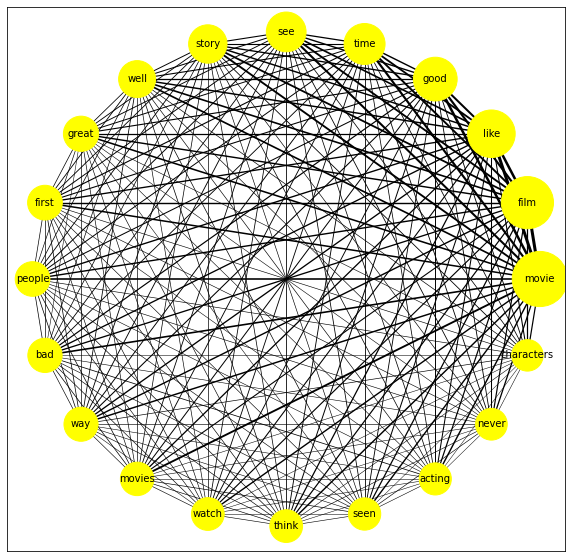

In [20]:
# Your answer here
from collections import Counter

###################################################################################
# The 'counter' object will have all the word count information. 
# The 'co_counter' object will have all the co-occurrence count information.
###################################################################################

counter = Counter()
co_counter = dict()

for l in df.words:
    word_set = set()
    
    for item in l:
        word = item.lower()
        
        if word not in (global_stopwords + local_stopwords):
            word_set.add(word)

    counter.update(word_set)
    
    ###################################################################################
    # Calculate co-occurrence count of two words and save it in 'co_counter' 
    ###################################################################################

    words = list(word_set)
    for word1 in words:
        if word1 not in co_counter:
            co_counter[word1] = dict()
        
        for word2 in words:

            ######################################
            # Skip if the two words are the same.
            ######################################

            if word1 == word2:
                continue
            
            if word2 not in co_counter[word1]:
                co_counter[word1][word2] = 1
            else:
                co_counter[word1][word2] += 1
                
import networkx as nx

G = nx.Graph()

num_nodes = 20

nodes = [item[0] for item in counter.most_common(num_nodes)]
node_weights = [item[1] for item in counter.most_common(num_nodes)]

for word in nodes:
    G.add_node(word, weight=counter.get(word))
    
for word1 in nodes:
    for word2 in nodes:
        if (word1 != word2) & (word2 in co_counter[word1]):
            G.add_edge(word1, word2, weight=co_counter[word1][word2])
            
edges = nx.get_edge_attributes(G, "weight").keys()
edge_weights = nx.get_edge_attributes(G, "weight").values()
edge_weights = [item / 500 for item in edge_weights]

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos=nx.circular_layout(G), 
                 nodelist=nodes, node_size=node_weights, edgelist=edges, width=edge_weights,
                 node_color="yellow", with_labels=True, font_size=10)
plt.draw()

### Now that you have completed all the questions, click Kernel > Restart & Run All to creat a clean version of this notebook and check if all cells have run as expected. 